# 1. Load the Titanic Dataset

The Titanic dataset is a popular dataset to explore survival trends based on demographics and class.

In [1]:
# Importing required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset directly from seaborn's built-in collection
df = sns.load_dataset("titanic")

# Display the top rows of the dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. Check Data Summary and Missing Values

Inspect the dataset for shape, column names, missing values, and data types.

In [2]:
# Basic structure and summary of the dataset
print("Dataset Dimensions:", df.shape)
print("\nAvailable Columns:\n", df.columns.to_list())

# Check for null values
missing = df.isnull().sum()
print("\nMissing Values Per Column:\n", missing)

# Data types and descriptive statistics
print("\nData Types of Each Column:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe(include='all'))



Dataset Dimensions: (891, 15)

Available Columns:
 ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Missing Values Per Column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data Types of Each Column:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Descriptive Statistics:
           survived      pclass   sex         ag

In [3]:
# Evaluate percentage of missing data per feature
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values in Each Column:\n", missing_percent)


Percentage of Missing Values in Each Column:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


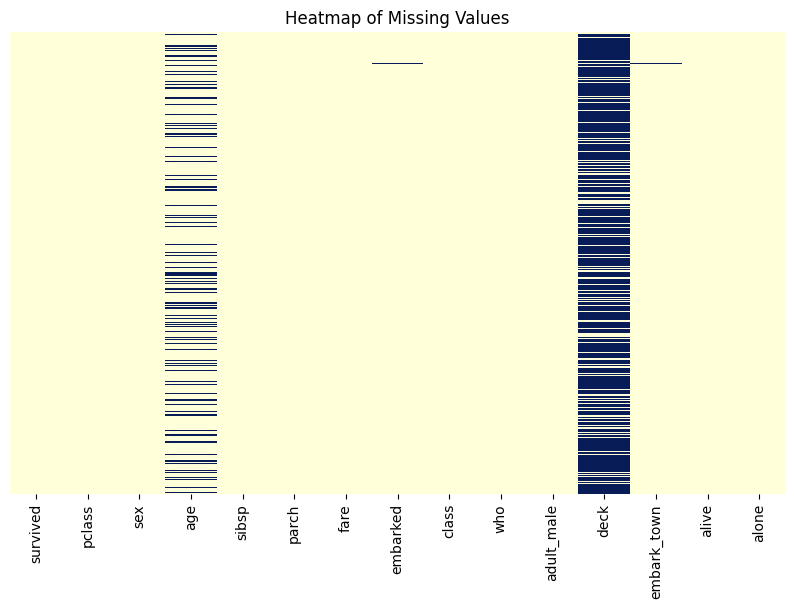

In [4]:
# Visualize missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

## **Impute Missing Values**

In [6]:
#Handle missing data using a machine learning-based imputation approach

# Required libraries for advanced imputation
from sklearn.experimental import enable_iterative_imputer  # Enables the experimental feature
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Work on a separate copy to retain original dataset
df_imputed = df.copy()

# Identify numerical and categorical columns
num_features = df_imputed.select_dtypes(include='number').columns
cat_features = df_imputed.select_dtypes(exclude='number').columns

# Imputation for numerical columns using Random Forest via Iterative Imputer
num_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42))
df_imputed[num_features] = num_imputer.fit_transform(df_imputed[num_features])

# Fill missing values in categorical columns with the most common value
for feature in cat_features:
    most_frequent = df_imputed[feature].mode()[0]
    df_imputed[feature] = df_imputed[feature].fillna(most_frequent)

# Final check to confirm all missing values are handled
print("\nRemaining missing values (if any):\n", df_imputed.isnull().sum())



Remaining missing values (if any):
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


# 3. Univariate Analysis

Explore individual variables (survived, pclass, age, sex).


Number of Survivors and Non-Survivors:
 survived
0.0    549
1.0    342
Name: count, dtype: int64


/tmp/ipython-input-7-16291784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_imputed, x='survived', palette='pastel')


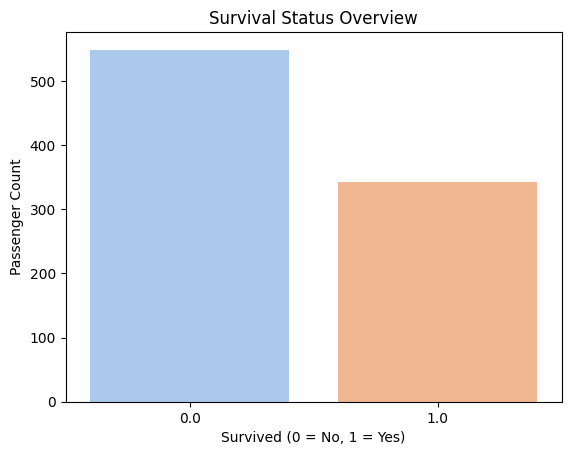


Passenger Class Counts:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


/tmp/ipython-input-7-16291784.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_imputed, x='pclass', palette='Set2')


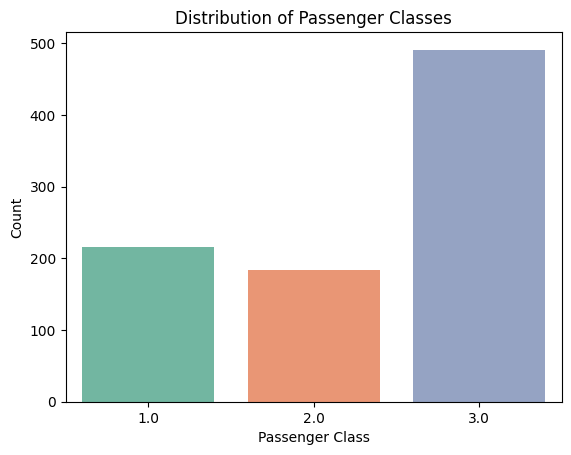


Age Summary Statistics:
 count    891.000000
mean      29.686434
std       13.809000
min        0.420000
25%       21.000000
50%       28.283703
75%       38.000000
max       80.000000
Name: age, dtype: float64


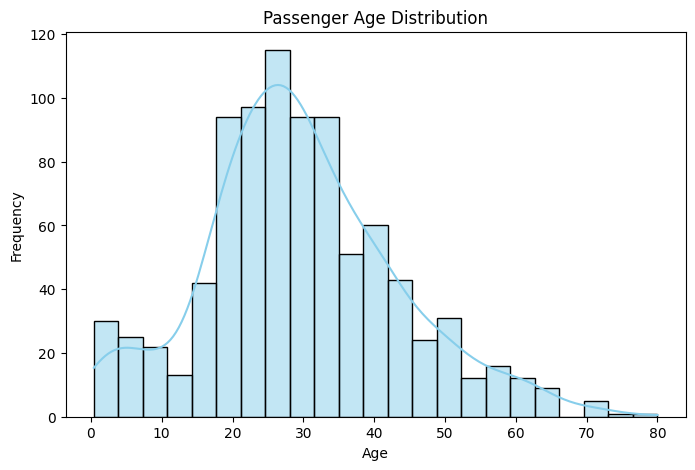


Gender Breakdown:
 sex
male      577
female    314
Name: count, dtype: int64


/tmp/ipython-input-7-16291784.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_imputed, x='sex', palette='coolwarm')


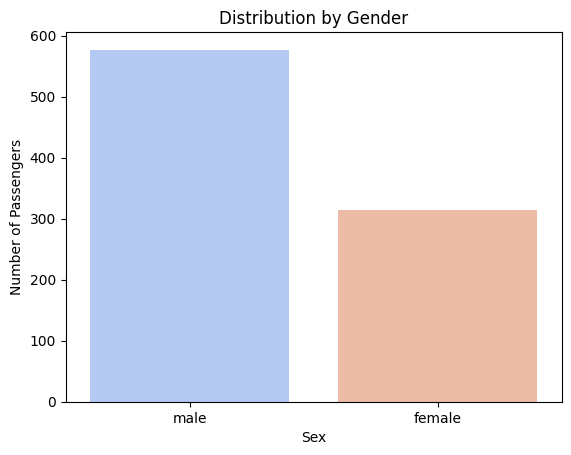

In [7]:
# Overview of survival outcome
print("\nNumber of Survivors and Non-Survivors:\n", df_imputed['survived'].value_counts())

sns.countplot(data=df_imputed, x='survived', palette='pastel')
plt.title("Survival Status Overview")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.show()

# Passenger class distribution
print("\nPassenger Class Counts:\n", df_imputed['pclass'].value_counts())

sns.countplot(data=df_imputed, x='pclass', palette='Set2')
plt.title("Distribution of Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Descriptive statistics for Age
print("\nAge Summary Statistics:\n", df_imputed['age'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(data=df_imputed, x='age', kde=True, color='skyblue')
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution in the dataset
print("\nGender Breakdown:\n", df_imputed['sex'].value_counts())

sns.countplot(data=df_imputed, x='sex', palette='coolwarm')
plt.title("Distribution by Gender")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.show()


# 4. Bivariate Analysis

Explore survival trends based on gender, class, and age.


Survival Count by Gender:
 sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


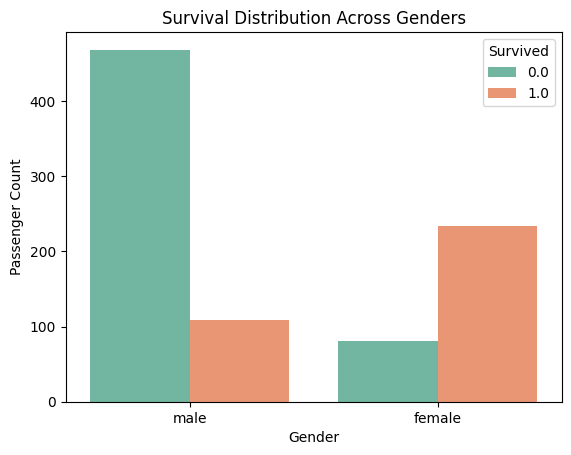


Survival Count by Passenger Class:
 pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


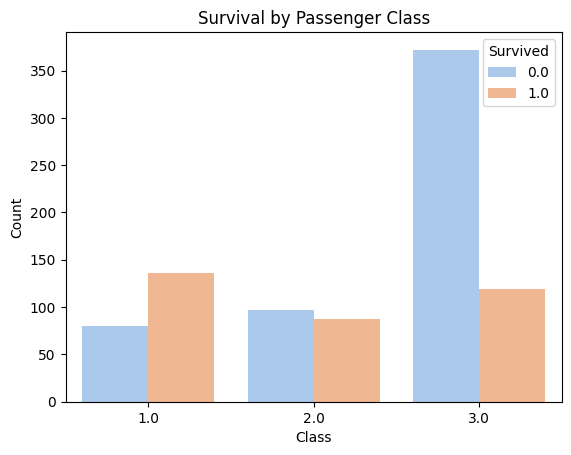


Survival Distribution by Age Category:
 age_category  survived
Child         0.0          80
              1.0          78
Adult         0.0         462
              1.0         263
Senior        0.0           7
              1.0           1
Name: count, dtype: int64


/tmp/ipython-input-8-2937331830.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival Distribution by Age Category:\n", df_imputed.groupby('age_category')['survived'].value_counts())


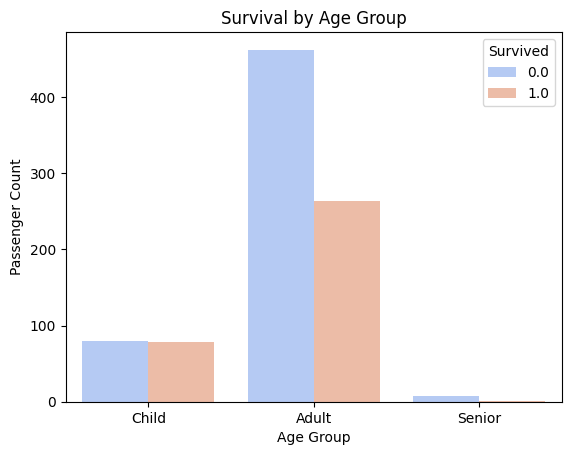


Survival Breakdown by Gender and Class:
 sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


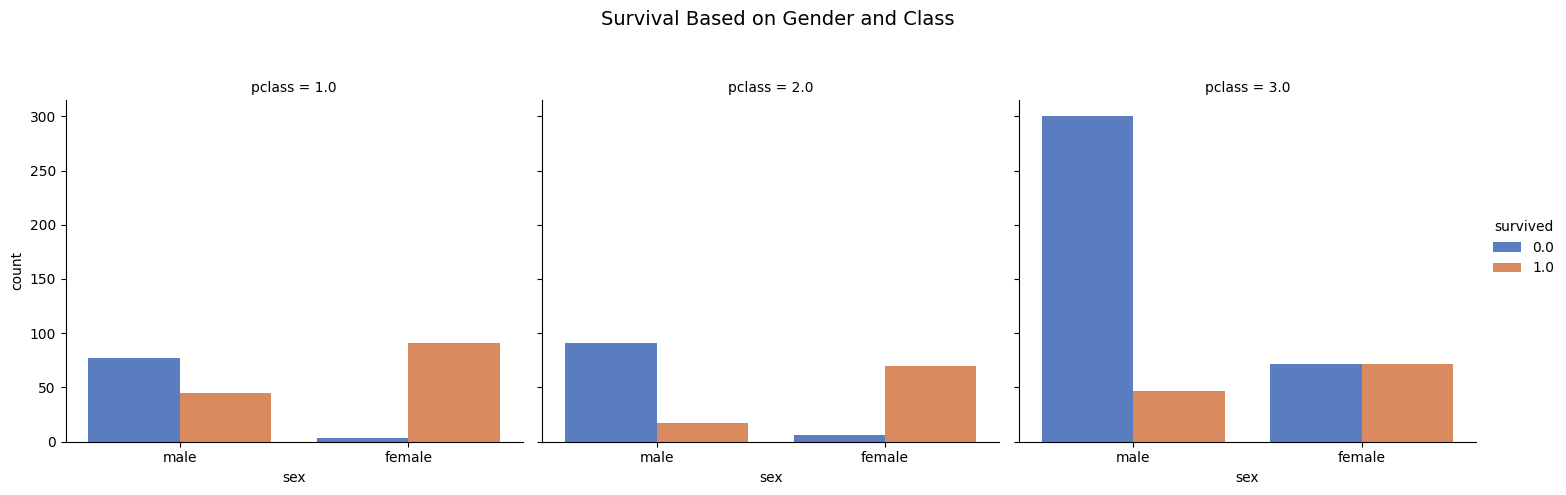

In [8]:
# Survival distribution by gender
print("\nSurvival Count by Gender:\n", df_imputed.groupby('sex')['survived'].value_counts())

sns.countplot(data=df_imputed, x='sex', hue='survived', palette='Set2')
plt.title("Survival Distribution Across Genders")
plt.xlabel("Gender")
plt.ylabel("Passenger Count")
plt.legend(title="Survived")
plt.show()

# Survival distribution by passenger class
print("\nSurvival Count by Passenger Class:\n", df_imputed.groupby('pclass')['survived'].value_counts())

sns.countplot(data=df_imputed, x='pclass', hue='survived', palette='pastel')
plt.title("Survival by Passenger Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

# Grouping age into categories and analyzing survival
df_imputed['age_category'] = pd.cut(df_imputed['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSurvival Distribution by Age Category:\n", df_imputed.groupby('age_category')['survived'].value_counts())

sns.countplot(data=df_imputed, x='age_category', hue='survived', palette='coolwarm')
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Passenger Count")
plt.legend(title="Survived")
plt.show()

# Combined analysis: Gender vs Class and their survival
print("\nSurvival Breakdown by Gender and Class:\n", df_imputed.groupby(['sex', 'pclass'])['survived'].value_counts())

sns.catplot(
    data=df_imputed,
    x='sex',
    hue='survived',
    col='pclass',
    kind='count',
    palette='muted'
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival Based on Gender and Class", fontsize=14)
plt.show()


# 5. Insights from Analysis

## Findings

- **Gender**: Females had a higher survival rate compared to males.

- **Class**: Passengers in 1st class had better chances of survival.

- **Age**: Younger passengers (children) were more likely to survive.

# 6. Survival Analysis

We’ll analyze how survival depends on specific features, such as:



- Embarkation points.

- Fare ranges.

- Family size (combining sibsp and parch).

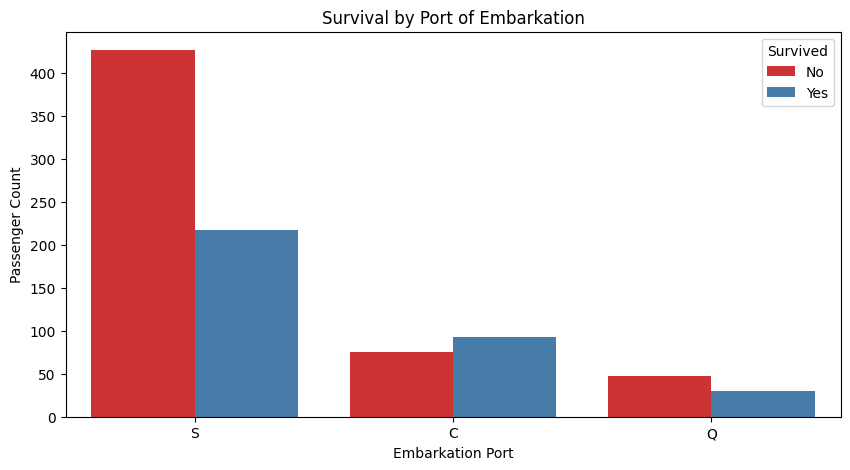

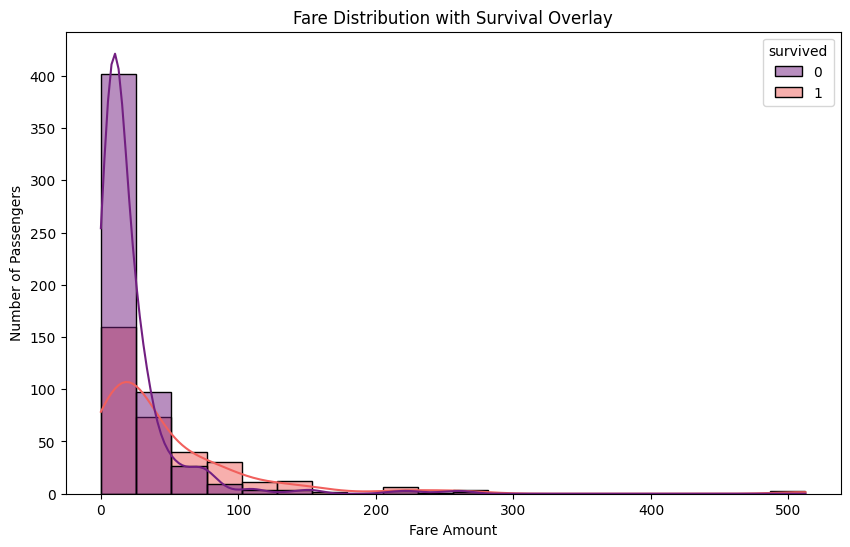

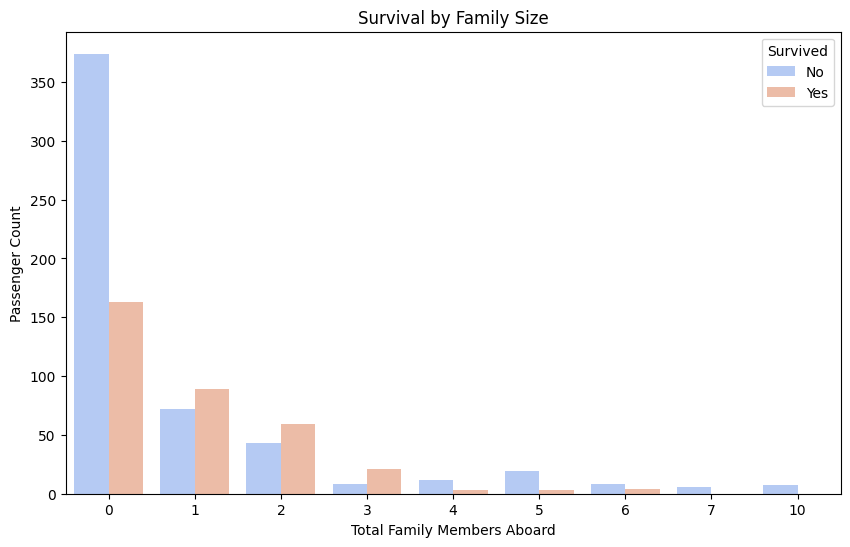

In [10]:
# Survival rates by embarkation location
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='embarked', hue='survived', palette='Set1')
plt.title("Survival by Port of Embarkation")
plt.xlabel("Embarkation Port")
plt.ylabel("Passenger Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# Distribution of fare categorized by survival status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fare', hue='survived', bins=20, kde=True, palette='magma')
plt.title("Fare Distribution with Survival Overlay")
plt.xlabel("Fare Amount")
plt.ylabel("Number of Passengers")
plt.show()

# Create a new column to represent total family size onboard
df['family_size'] = df['sibsp'] + df['parch']

# Analyze survival trends based on family size
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_size', hue='survived', palette='coolwarm')
plt.title("Survival by Family Size")
plt.xlabel("Total Family Members Aboard")
plt.ylabel("Passenger Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()



# 7. Feature Engineering

Create meaningful features for better insights:



- **Family Size**: Combine sibsp and parch.

- **Age Group**: Categorize passengers into age brackets.

Code

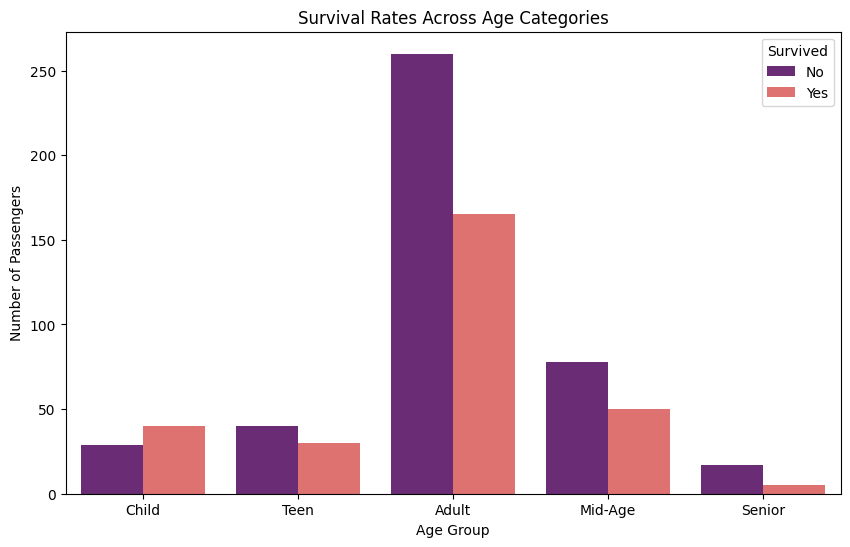

In [11]:
# Categorize passengers into custom age brackets
age_bins = [0, 12, 18, 40, 60, 80]
age_labels = ['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Visual comparison of survival across age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='survived', palette='magma')
plt.title("Survival Rates Across Age Categories")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# 8. Advanced Visualization (Heatmap)

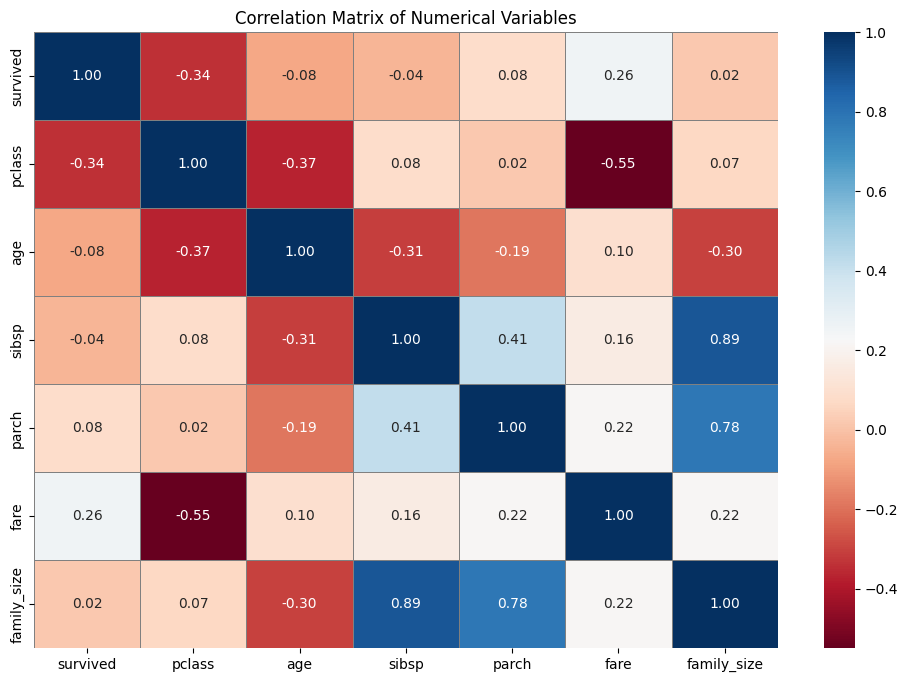

In [12]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))

# Filter numeric columns for correlation computation
num_cols = df.select_dtypes(include='number')

# Plot the correlation heatmap
sns.heatmap(num_cols.corr(), annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


# **Conclusion and Analysis of Titanic Dataset EDA**



After conducting a detailed exploratory data analysis (EDA) on the Titanic dataset, here are the key findings and insights:



---



### **1. Demographic Insights**

- **Gender:**  

  - Females had a significantly higher survival rate compared to males. This aligns with the historical "women and children first" policy during the evacuation.

  

- **Age Groups:**  

  - Children (age ≤12) had the highest survival rate among all age groups.  

  - Adults (18–40 years) had a moderate survival rate, whereas older passengers (60+ years) had lower chances of survival.



---



### **2. Socioeconomic Insights**

- **Passenger Class (Pclass):**  

  - Passengers in **1st class** had much better survival chances compared to those in **2nd** or **3rd class**.  

  - The survival disparity likely resulted from better access to lifeboats and proximity to rescue points on the ship.



- **Fare:**  

  - Higher ticket fares were associated with increased survival rates. Wealthier passengers were more likely to be in 1st class, which offered better safety measures.



---



### **3. Family and Social Connections**

- **Family Size:**  

  - Passengers with small family sizes (1–3 members) had higher survival rates.  

  - Large families (5+ members) had a lower likelihood of survival, possibly due to challenges in coordinating and accessing lifeboats.



- **SibSp and Parch:**  

  - Passengers traveling alone had lower survival rates compared to those with companions.



---



### **4. Embarkation Point**

- Passengers who embarked at **Cherbourg (C)** had the highest survival rate.  

- Those who boarded at **Southampton (S)** had moderate survival chances, while **Queenstown (Q)** passengers had the lowest survival rates.



---



### **5. Correlation Analysis**

- Strong positive correlation observed between **fare** and **survived**, indicating that economic status played a significant role in survival.

- A slight correlation between **pclass** and **fare**, emphasizing the advantages of being in the upper classes.



---



### **Final Observations**

- **Survival Trends:** Survival was heavily influenced by gender, age, socioeconomic status, and embarkation point.  

- **Disparities:** Gender and class disparities were the most striking survival determinants, with females and 1st-class passengers significantly more likely to survive.  

- **Data Completeness:** The dataset had some missing values (e.g., `age`), which were handled through imputation, ensuring a robust analysis.



---



### **Recommendations for Future Analysis**

1. **Predictive Modeling:**  

   Use machine learning algorithms (e.g., Logistic Regression, Random Forest) to predict survival using these insights.



2. **Detailed Behavioral Studies:**  

   Explore time-series or sequence-based data (if available) to understand the evacuation process better.



3. **Feature Engineering:**  

   Combine or create more features, such as interaction terms between `pclass` and `sex` or non-linear transformations of `fare`.


